# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/vishnuvardhan/Documents/Fintech/API.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [9]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [11]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
price_btc = btc_data["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()
price_eth =eth_data["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc*price_btc
my_eth_value=my_eth*price_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $53505.60
The current value of your 5.3 ETH is $12897.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [16]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"key type {type(alpaca_api_key)},{type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

key type <class 'str'>,<class 'str'>


In [18]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2024-02-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(tickers,timeframe,start = today,end = today).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
df_portfolio_close=df_portfolio[['close','symbol']]
df_portfolio_con=df_portfolio_close.set_index("symbol")


# Preview DataFrame
# YOUR CODE HERE!
df_portfolio_con

,close
symbol,
AGG,97.96
SPY,498.10


In [20]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=df_portfolio_con.loc["AGG","close"]
spy_close_price=df_portfolio_con.loc["SPY","close"]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.96
Current SPY closing price: $498.1


In [22]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value=agg_close_price*my_agg
my_spy_value=spy_close_price*my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24905.00
The current value of your 200 AGG shares is $19592.00


### Savings Health Analysis

In [25]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000

# Consolidate financial assets data
# YOUR CODE HERE!
df_dic={'crypto':{'Total value in dollars':(my_btc_value+my_eth_value)},'shares':{'Total value in dollars':(my_spy_value+my_agg_value)}}
df_savings =pd.DataFrame(df_dic).T
# Create savings DataFrame
# YOUR CODE HERE!
df_savings =pd.DataFrame(df_dic).T
# Display savings DataFrame
display(df_savings)

,Total value in dollars
crypto,66402.938
shares,44497.000


array([<Axes: ylabel='Total value in dollars'>], dtype=object)

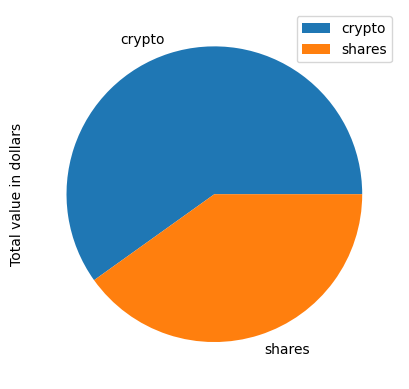

In [27]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie',subplots=True)

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=df_savings["Total value in dollars"].sum()
# Validate saving health
# YOUR CODE HERE!
if total_savings>emergency_fund:
    print("Congrats to you for having enough money in this fund")
elif total_savings==emergency_fund:
    print("Congrats to you for on reaching this financial goal")
else:
    print(f"You are {abs(total_savings-emergency_fund)}$ away from reaching the goal")

Congrats to you for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [74]:
# Set start and end dates of 10 years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2013-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [76]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")
df_ticker = api.get_bars(tickers,timeframe,start=start_date,end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])
# Display sample data
df_stock_data

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2016-01-04 05:00:00+00:00  107.97  108.29  107.9300       14860  108.09   
2016-01-05 05:00:00+00:00  108.02  108.12  107.8700        8860  107.87   
2016-01-06 05:00:00+00:00  108.43  108.46  108.2200       13183  108.35   
2016-01-07 05:00:00+00:00  108.42  108.47  108.2100       12305  108.40   
2016-01-08 05:00:00+00:00  108.66  108.71  108.3500       11442  108.57   
...                           ...     ...       ...         ...     ...   
2023-04-25 04:00:00+00:00  100.18  100.25   99.9636       26743   99.97   
2023-04-26 04:00:00+00:00   99.81  100.22   99.7200       18350  100.16   
2023-04-27 04:00:00+00:00   99.45   99.63   99.3900       21343   99.61   
2023-04-28 04:00:00+00:00   99.96   99.99   99.7200       24407   99.99   
2023-05-01 04:00:00+00:00   98.69   99.41   98.5950       24228   99.35   

                                                      SPY                   \
                             volume        vwap     close    high      low   
timestamp                                                                    
2016-01-04 05:00:00+00:00   3821479  108.078566  201.0192  201.03  198.590   
2016-01-05 05:00:00+00:00   2757684  107.990501  201.3600  201.90  200.050   
2016-01-06 05:00:00+00:00   3048156  108.363216  198.8200  200.06  197.600   
2016-01-07 05:00:00+00:00   2530827  108.368381  194.0500  197.44  193.590   
2016-01-08 05:00:00+00:00   4047091  108.587804  191.9230  195.85  191.580   
...                             ...         ...       ...     ...      ...   
2023-04-25 04:00:00+00:00   5065415  100.112017  406.0800  411.16  406.020   
2023-04-26 04:00:00+00:00   3723566   99.907609  404.3600  407.84  403.780   
2023-04-27 04:00:00+00:00   4018321   99.478744  412.4100  412.69  406.740   
2023-04-28 04:00:00+00:00   5469882   99.900869  415.9300  415.94  411.430   
2023-05-01 04:00:00+00:00  10631644   99.028458  415.5100  417.62  415.265   

                                                                       
                          trade_count     open     volume        vwap  
timestamp                                                              
2016-01-04 05:00:00+00:00      655489  200.490  225903783  200.656423  
2016-01-05 05:00:00+00:00      418709  201.405  112719152  201.084280  
2016-01-06 05:00:00+00:00      548386  198.330  153948196  198.956460  
2016-01-07 05:00:00+00:00      796451  195.330  216191953  195.345911  
2016-01-08 05:00:00+00:00      754102  195.190  216105404  193.644537  
...                               ...      ...        ...         ...  
2023-04-25 04:00:00+00:00      611558  410.580   97766721  408.273308  
2023-04-26 04:00:00+00:00      571685  406.720   80447049  405.599605  
2023-04-27 04:00:00+00:00      614869  407.000   92968369  410.101896  
2023-04-28 04:00:00+00:00      611065  411.490   89312589  414.398827  
2023-05-01 04:00:00+00:00      502374  415.470   62122254  416.206574  

[1844 rows x 14 columns]

In [84]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist = MCSimulation(portfolio_data = df_stock_data,weights = [.4,.6],num_simulation = 500,num_trading_days = 252*30)

In [86]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_dist.portfolio_data.head()

AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-01-04 05:00:00+00:00  107.97  108.29  107.93       14860  108.09   
2016-01-05 05:00:00+00:00  108.02  108.12  107.87        8860  107.87   
2016-01-06 05:00:00+00:00  108.43  108.46  108.22       13183  108.35   
2016-01-07 05:00:00+00:00  108.42  108.47  108.21       12305  108.40   
2016-01-08 05:00:00+00:00  108.66  108.71  108.35       11442  108.57   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-01-04 05:00:00+00:00  3821479  108.078566          NaN  201.0192  201.03   
2016-01-05 05:00:00+00:00  2757684  107.990501     0.000463  201.3600  201.90   
2016-01-06 05:00:00+00:00  3048156  108.363216     0.003796  198.8200  200.06   
2016-01-07 05:00:00+00:00  2530827  108.368381    -0.000092  194.0500  197.44   
2016-01-08 05:00:00+00:00  4047091  108.587804     0.002214  191.9230  195.85   

                                                                               \
                              low trade_count     open     volume        vwap   
timestamp                                                                       
2016-01-04 05:00:00+00:00  198.59      655489  200.490  225903783  200.656423   
2016-01-05 05:00:00+00:00  200.05      418709  201.405  112719152  201.084280   
2016-01-06 05:00:00+00:00  197.60      548386  198.330  153948196  198.956460   
2016-01-07 05:00:00+00:00  193.59      796451  195.330  216191953  195.345911   
2016-01-08 05:00:00+00:00  191.58      754102  195.190  216105404  193.644537   

                                        
                          daily_return  
timestamp                               
2016-01-04 05:00:00+00:00          NaN  
2016-01-05 05:00:00+00:00     0.001695  
2016-01-06 05:00:00+00:00    -0.012614  
2016-01-07 05:00:00+00:00    -0.023992  
2016-01-08 05:00:00+00:00    -0.010961

In [88]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 110.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 120.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 130.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 140.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 150.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 160.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 170.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 180.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 190.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 200.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 210.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 220.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 230.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 240.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 250.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 260.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 270.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 280.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 290.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 300.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 310.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 320.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 330.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 340.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 350.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 360.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 370.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 380.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 390.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 400.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 410.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 420.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 430.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 440.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 450.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 460.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 470.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 480.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 490.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989468,1.001055,0.982953,1.000189,1.005008,0.998393,1.006359,1.013232,0.996398,0.987253,...,1.003285,0.989160,1.009695,1.008599,0.996120,0.993530,0.991149,0.994307,0.992225,0.997013
2,0.991250,1.003259,0.978357,0.980021,1.007252,1.001855,1.006825,1.016458,0.994486,0.984939,...,1.001923,0.991434,1.017305,0.995948,0.981844,0.975763,0.998460,0.985346,0.993679,0.992522
3,0.985291,1.008439,0.969737,0.974656,1.013939,1.009989,1.007143,1.021403,1.001657,0.973953,...,1.000737,0.979865,1.006286,0.990999,0.992965,0.972611,1.002566,0.979992,0.988359,1.002050
4,0.993222,1.013142,0.971888,0.984507,1.004570,1.002681,0.990499,1.006335,0.988577,0.967530,...,0.994159,0.989041,1.023078,0.987932,0.995494,0.972227,1.006105,0.976415,0.991289,1.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.804454,11.661745,5.910797,2.118737,5.412356,9.706964,7.103721,4.921175,5.004505,2.989952,...,12.716092,9.426044,3.108814,3.539276,5.369249,6.376591,6.833820,6.091651,2.967509,11.673525
7557,13.676591,11.582460,5.957730,2.125580,5.386242,9.781570,7.056281,4.988936,5.001362,2.979853,...,12.797214,9.423572,3.146289,3.565264,5.387754,6.292802,6.839810,6.064518,2.961692,11.723297
7558,13.631939,11.621178,5.978817,2.132930,5.379282,9.867304,6.988243,4.996693,5.047401,3.018568,...,12.806726,9.406214,3.145082,3.603771,5.379963,6.333341,6.735748,6.082030,2.928623,11.894979
7559,13.497777,11.581862,5.921149,2.123960,5.372219,9.902374,7.020101,4.947975,5.115993,3.002355,...,12.676119,9.407063,3.081679,3.587377,5.461331,6.405563,6.690807,6.089334,2.925120,11.794769


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

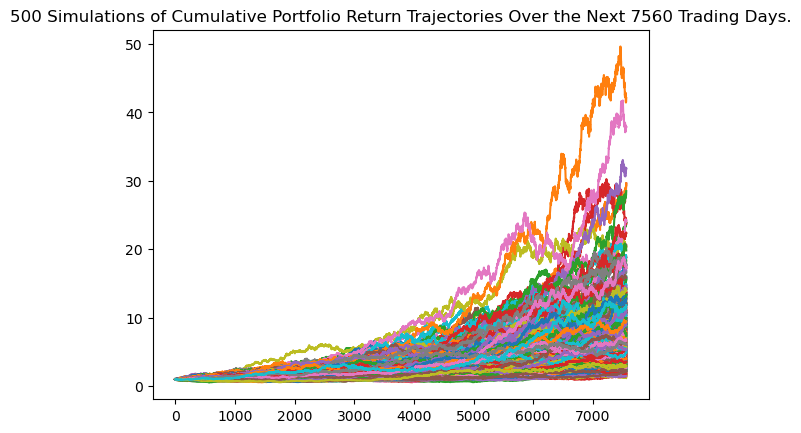

In [90]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_dist.plot_simulation()
line_plot

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

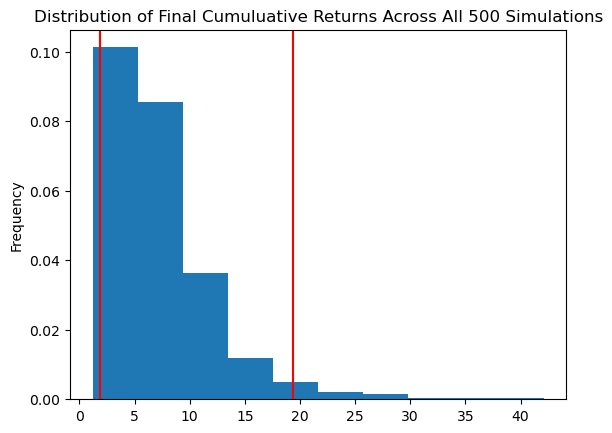

In [92]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist.plot_distribution()
dist_plot

### Retirement Analysis

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_tbl = MC_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
display(summary_tbl)

count           500.000000
mean              7.347679
std               5.037599
min               1.218779
25%               3.984860
50%               6.196594
75%               9.157707
max              42.103127
95% CI Lower      1.889915
95% CI Upper     19.393189
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [106]:

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $37798.29 and $387863.78


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment in 10 years

In [109]:
MC_dist_10 = MCSimulation(portfolio_data = df_stock_data,weights = [.4,.6],num_simulation = 500,num_trading_days = 252*10)
MC_dist_10.portfolio_data.head()


AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-01-04 05:00:00+00:00  107.97  108.29  107.93       14860  108.09   
2016-01-05 05:00:00+00:00  108.02  108.12  107.87        8860  107.87   
2016-01-06 05:00:00+00:00  108.43  108.46  108.22       13183  108.35   
2016-01-07 05:00:00+00:00  108.42  108.47  108.21       12305  108.40   
2016-01-08 05:00:00+00:00  108.66  108.71  108.35       11442  108.57   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-01-04 05:00:00+00:00  3821479  108.078566          NaN  201.0192  201.03   
2016-01-05 05:00:00+00:00  2757684  107.990501     0.000463  201.3600  201.90   
2016-01-06 05:00:00+00:00  3048156  108.363216     0.003796  198.8200  200.06   
2016-01-07 05:00:00+00:00  2530827  108.368381    -0.000092  194.0500  197.44   
2016-01-08 05:00:00+00:00  4047091  108.587804     0.002214  191.9230  195.85   

                                                                               \
                              low trade_count     open     volume        vwap   
timestamp                                                                       
2016-01-04 05:00:00+00:00  198.59      655489  200.490  225903783  200.656423   
2016-01-05 05:00:00+00:00  200.05      418709  201.405  112719152  201.084280   
2016-01-06 05:00:00+00:00  197.60      548386  198.330  153948196  198.956460   
2016-01-07 05:00:00+00:00  193.59      796451  195.330  216191953  195.345911   
2016-01-08 05:00:00+00:00  191.58      754102  195.190  216105404  193.644537   

                                        
                          daily_return  
timestamp                               
2016-01-04 05:00:00+00:00          NaN  
2016-01-05 05:00:00+00:00     0.001695  
2016-01-06 05:00:00+00:00    -0.012614  
2016-01-07 05:00:00+00:00    -0.023992  
2016-01-08 05:00:00+00:00    -0.010961

In [111]:
# Run a Monte Carlo simulation to forecast 10 year return
MC_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

Running Monte Carlo simulation number 490.


/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/vishnuvardhan/Documents/Fintech/Chlanges/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWar

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000685,1.001000,0.991280,1.000662,0.991718,1.003464,0.989608,0.988986,1.006207,1.000483,...,1.008221,1.000765,1.009061,1.001775,1.005980,1.004959,0.993488,1.001293,0.995518,1.007240
2,1.002866,0.991694,0.989487,0.991780,0.997478,1.009977,0.997279,0.987261,1.016484,1.003774,...,1.002988,1.008882,1.008345,0.998014,1.001371,1.019329,0.992820,1.016164,0.985036,1.010485
3,1.008077,0.983203,0.988622,0.979876,1.005972,1.022908,0.989761,0.994011,1.011688,1.004960,...,1.015359,1.009667,1.003262,0.997262,1.009710,1.029940,1.009758,1.016853,0.985124,1.013908
4,1.009384,0.977764,0.994087,0.973950,0.996314,1.020611,1.000334,0.995208,1.016513,1.007298,...,1.005644,1.012546,1.003712,1.002230,1.019803,1.048415,1.004288,1.022545,0.980016,0.995664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.994106,1.765813,4.725102,1.303586,1.687492,2.373985,1.953401,3.661101,1.260764,1.444446,...,1.551186,3.214395,2.028454,3.120459,1.984342,1.184243,3.029786,5.324839,2.385685,1.510940
2517,0.994513,1.771814,4.710319,1.308479,1.650993,2.364411,1.946384,3.677358,1.272182,1.441280,...,1.544166,3.203116,2.042254,3.088625,1.971917,1.191609,3.035178,5.314479,2.358487,1.511520
2518,0.990804,1.772743,4.683351,1.317327,1.650182,2.354984,1.954843,3.672749,1.259617,1.436128,...,1.558186,3.214830,2.042162,3.064857,1.955205,1.183350,3.030252,5.257161,2.353267,1.495654
2519,0.993558,1.767268,4.703087,1.332156,1.658754,2.358382,1.942670,3.684286,1.263649,1.426703,...,1.567038,3.214212,2.045771,3.068456,1.968001,1.172014,3.045687,5.214363,2.359232,1.487831


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

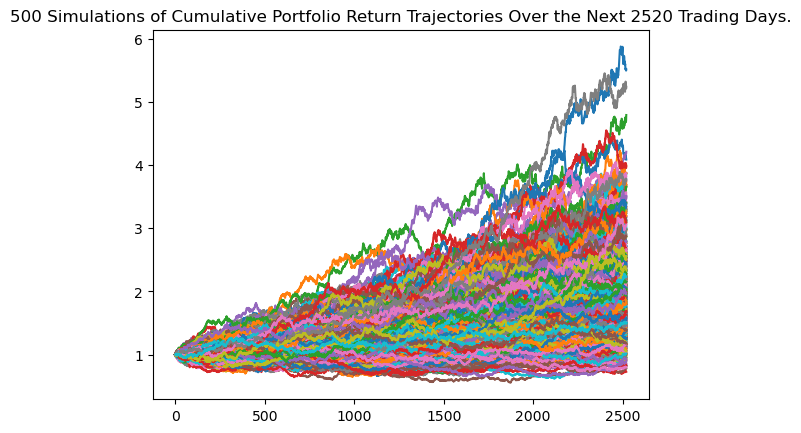

In [113]:
# Plot simulation outcomes
line_plot_10 = MC_dist_10.plot_simulation()
line_plot_10

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

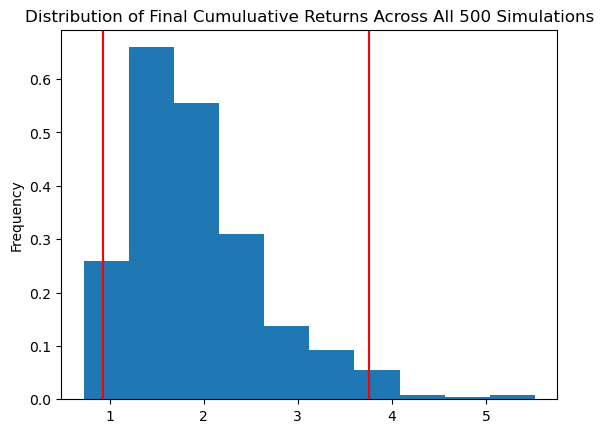

In [120]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_dist_10.plot_distribution()
dist_plot_10

In [128]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_tbl_10 = MC_dist_10.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
display(summary_tbl_10)

count           500.000000
mean              1.940118
std               0.729024
min               0.727170
25%               1.435250
50%               1.804571
75%               2.281278
max               5.517861
95% CI Lower      0.925299
95% CI Upper      3.757938
Name: 2520, dtype: float64

In [130]:
# Set initial investment
initial_investment_10 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower_10 = round(summary_tbl_10[8]*initial_investment_10,2)
ci_upper_10 = round(summary_tbl_10[9]*initial_investment_10,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18505.98 and $75158.76


## Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?
### no there is a risk that the investment may go on a loss but having heavy investment in stocks is good.